In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:
input_path = './data/testD.mp4'
video1 = cv2.VideoCapture(input_path)

In [3]:
with open('darknet/cfg/coco.names') as f:
    labels = [line.strip() for line in f]
network = cv2.dnn.readNet('darknet/cfg/yolov3.weights', 'darknet/cfg/yolov3.cfg')
ln = network.getLayerNames()
ln = [ln[i-1] for i in network.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(labels), 3))

1719 1044


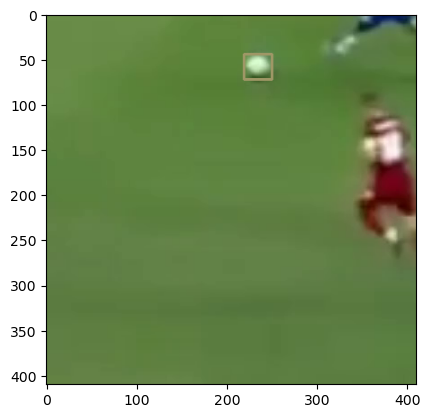

In [19]:
fr = 0
hi = True
video1.set(cv2.CAP_PROP_POS_FRAMES, fr)
while True:
    ret, frame = video1.read()
    if hi:
        rfrom = 1000
        cfrom = 1500
        frame = frame[rfrom:rfrom+410, cfrom:cfrom+410]

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask_ground = cv2.inRange(frame_hsv, np.array([0,0,0]), np.array([255,60,255]))


    plt.figure()
    SPORTS_BALL = 32
    height, width = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1/255., (416, 416), swapRB=True, crop=False)
    network.setInput(blob)
    output_from_network = network.forward(ln)
    boxes=[]
    confidences = []
    for out in output_from_network:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            if class_id != SPORTS_BALL: continue
            confidence = scores[class_id]
            if confidence>0.1:
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int((detection[0] - detection[2]/2) * width)
                y = int((detection[1] - detection[3]/2) * height)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.4)
    boxes = np.asarray(boxes)[indexes]
    for i, box in enumerate(boxes):
        x, y, w, h = box
        color = colors[i]
        cv2.rectangle(frame, (x,y), (x+w, y+h), color, 2)
    print(x+cfrom, y+rfrom)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    break

In [142]:
import pickle
with open('temp.pickle', 'rb') as fp:
    human_tids_tlwhs_list = pickle.load(fp)
with open('balltemp.pickle', 'rb') as fp:
    ball_xywh_array = pickle.load(fp)

In [156]:
target_ball_col = np.nonzero(ball_xywh_array[:,2])[0]
frame_len = ball_xywh_array.shape[0]
inter_ball = np.zeros_like(ball_xywh_array)
for i in range(4):
    fp = ball_xywh_array[target_ball_col, i].flatten()
    inter_ball[:,i] = np.interp(np.arange(frame_len), target_ball_col, fp)
    print(target_ball_col.shape)
    print(fp.shape)
print(inter_ball)
# np.interp()

(149,)
(149,)
(149,)
(149,)
(149,)
(149,)
(149,)
(149,)
[[878 287   9   8]
 [880 287   9  10]
 [880 288  10  10]
 [881 289  10  10]
 [881 289  11  11]
 [882 290  10  11]
 [883 291  10  10]
 [884 291  10  10]
 [885 291  10  10]
 [886 292  10  10]
 [885 293   9   8]
 [887 293   9   9]
 [890 293   9   9]
 [891 293  10  10]
 [893 293  10  10]
 [894 293  11  10]
 [896 294  11   9]
 [897 294  10  10]
 [899 295   9  10]
 [900 295  10  10]
 [901 295  10  10]
 [902 296   9   9]
 [904 297   9   9]
 [906 297   9   9]
 [907 297  10  10]
 [908 297   8   8]
 [909 297   9   9]
 [911 297  10  10]
 [913 298  11   9]
 [915 298  10  10]
 [914 299   9   9]
 [916 298   8   7]
 [919 298  10  10]
 [921 299  11  10]
 [922 299  11  10]
 [924 299  10  10]
 [926 300  10  10]
 [926 300   9   9]
 [926 301   9   9]
 [927 301   9   9]
 [927 302   9   9]
 [928 302   9   9]
 [928 303   9   9]
 [929 304   9   9]
 [929 305  10   9]
 [928 305   9   9]
 [929 305  11  10]
 [929 305  12  11]
 [930 306  11  11]
 [931 306  10

In [185]:
np.argmax(np.abs(np.diff(np.diff(inter_ball, axis=0), axis=0))[:,0])
a = np.abs(np.diff(np.diff(inter_ball, axis=0), axis=0))
b = np.square(a[:,:2]).sum(axis=1)
np.where(b>19)[0]
# np.argmax(np.abs(np.diff(np.diff(inter_ball, axis=0), axis=0))[:,1])

array([107, 113, 114, 115, 166])

In [102]:
print(len(human_tids_tlwhs_list[0]))
print(human_tids_tlwhs_list[0][1][0])

2
[1586.25        847.80004883   70.20007324   90.45001221]


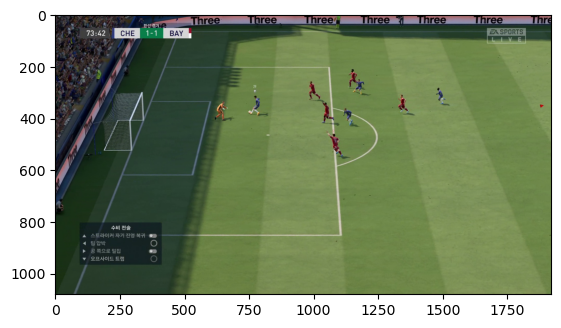

In [195]:
fr = 166
video1.set(cv2.CAP_PROP_POS_FRAMES, fr)
while True:
    ret, frame = video1.read()
    if not ret: break
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    break

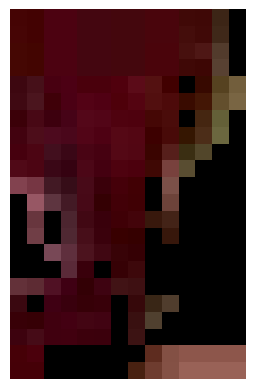

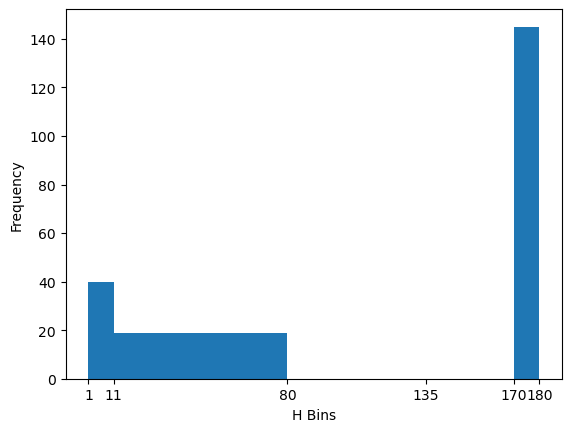

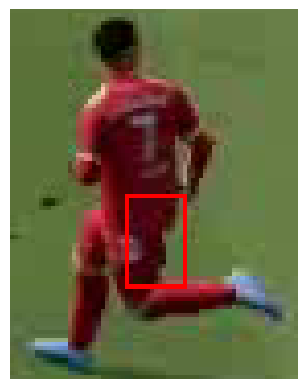

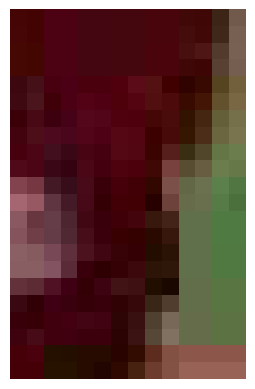

In [140]:
fr = 0
video1.set(cv2.CAP_PROP_POS_FRAMES, fr)
while True:
    ret, frame = video1.read()
    if not ret: break
    x, y, w, h = human_tids_tlwhs_list[0][1][0]
    x, y, w, h = int(x), int(y), int(w), int(h)
    player = frame[y:y+h, x:x+w]
    get_butt_HSV(player)
    butt = player[h//2:3*h//4, 2*w//5:3*w//5].copy()
    cv2.rectangle(player, (2*w//5,h//2), (3*w//5,3*h//4), (0,0,255), 1)
    plt.imshow(cv2.cvtColor(player, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    plt.figure()
    plt.imshow(cv2.cvtColor(butt, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    fr += 1
    break

In [139]:
def get_butt_HSV(box):
    h, w = box.shape[:2]
    butt = box[h//2:3*h//4, 2*w//5:3*w//5]
    bh, bw = butt.shape[:2]
    if bh < 2 or bw < 2: return 0
    butt_hsv = cv2.cvtColor(butt, cv2.COLOR_BGR2HSV)
    butt_H = butt_hsv[:,:,0]
    butt_S = butt_hsv[:,:,1]
    butt_V = butt_hsv[:,:,2]
    some_butt = np.where(butt_S.reshape(bh, bw, 1)>100, butt_hsv, [0,0,0]).astype(np.uint8)
    some_butt = np.where(butt_V.reshape(bh, bw, 1)>50, some_butt, [0,0,0]).astype(np.uint8)
    some_butt = np.where((butt_H.reshape(bh,bw,1)>80)|(butt_H.reshape(bh,bw,1)<30), some_butt, [0,0,0]).astype(np.uint8)
    plt.figure()
    plt.imshow(cv2.cvtColor(some_butt, cv2.COLOR_HSV2RGB))
    plt.axis('off')
    plt.show()
    bins = np.array([1, 11, 80, 135, 170, 180])
    hist, _ = np.histogram(some_butt[:,:,0].flatten(), bins)
    plt.figure()
    plt.stairs(hist, _, fill=True)
    plt.xticks(_)
    plt.xlabel('H Bins')
    plt.ylabel('Frequency')
    plt.show()
    category = np.argmax(hist)
    # print(category, hist)
    if hist.sum() < 20 or category not in [0, 2, 4]: return 0 #'else'
    if category in [0, 4]: return 1 #'red'
    return 2 #'blue'

In [71]:
def team_cluster(human_tids_tlwhs_list, video1):
    print('Clustering Teams ...')
    video1.set(cv2.CAP_PROP_POS_FRAMES, 0)
    tid_set = set([])
    for tids, tlwhs in human_tids_tlwhs_list:
        tid_set = tid_set.union(set(tids))
    tid_num = len(tid_set)
    tid_list = np.array(list(tid_set))
    tid_category_counter = np.zeros((tid_num, 3), dtype=int)
    fr = 0
    while True:
        ret, frame = video1.read()
        if not ret: break
        tids, tlwhs = human_tids_tlwhs_list[fr]
        for tid, (x1, y1, w, h) in zip(tids, tlwhs):
            x, y, w, h = int(x1), int(y1), int(w), int(h)
            category = get_butt_HSV(frame[y:y+h, x:x+w])
            tid_category_counter[np.where(tid_list==tid)[0][0], category] += 1
        fr += 1
    tid_category = tid_category_counter.argmax(axis=1)
    red_tids = list(tid_list[tid_category==1])
    blue_tids = list(tid_list[tid_category==2])
    red_tlwhs_array, blue_tlwhs_array = modify_datastruct(human_tids_tlwhs_list, red_tids, blue_tids)
    return red_tlwhs_array, blue_tlwhs_array


def modify_datastruct(human_tids_tlwhs_list, red_tids, blue_tids):
    frame_len = len(human_tids_tlwhs_list)
    red_tlwhs_array = np.zeros((len(red_tids), frame_len, 4), dtype=int)
    blue_tlwhs_array = np.zeros((len(blue_tids), frame_len, 4), dtype=int)
    for fr, (tids, tlwhs) in enumerate(human_tids_tlwhs_list):
        for tid, (x1, y1, w, h) in zip(tids, tlwhs):
            x, y, w, h = int(x1), int(y1), int(w), int(h)
            if tid in red_tids:
                red_tlwhs_array[red_tids.index(tid), fr, :] = (x, y, w, h)
            if tid in blue_tids:
                blue_tlwhs_array[blue_tids.index(tid), fr, :] = (x, y, w, h)
    return red_tlwhs_array, blue_tlwhs_array

In [ ]:
fr = 0
video1.set(cv2.CAP_PROP_POS_FRAMES, fr)
keeper_category = [0, 0, 0]
done = False
while True:
    ret, frame = video1.read()
    if not ret: break
    tids, tlwhs = human_tids_tlwhs_list[fr]
    for tid, (x1, y1, w, h) in zip(tids, tlwhs):
        x, y, w, h = int(x1), int(y1), int(w), int(h)
        if tid != 14: continue
        done = True
        category = get_butt_HSV(frame[y:y+h, x:x+w])
        keeper_category[category] += 1
    # if done: break
    fr += 1
print(keeper_category)

In [72]:
red_tlwhs_array, blue_tlwhs_array = team_cluster(human_tids_tlwhs_list, video1)
# print(red.shape)
print()
# print(blue)

Clustering Teams ...



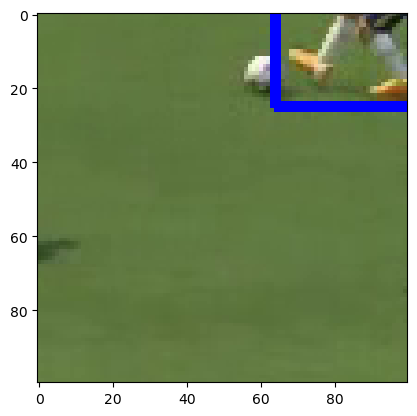

In [87]:
fr = 110
RED_COLOR = (0,0,255)
BLUE_COLOR = (255,0,0)
video1.set(cv2.CAP_PROP_POS_FRAMES, fr)
while True:
    ret, frame = video1.read()
    tids, tlwhs = human_tids_tlwhs_list[fr]
    # for tid, (x1, y1, w, h) in zip(tids, tlwhs):
    #     if tid != 14: continue
    #     x, y, w, h = int(x1), int(y1), int(w), int(h)
    #     cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)
    #     cv2.putText(frame, str(tid), (x,y-10), 1, 2, (0,0,255), 2)
    for rtid, fr_xlwh in enumerate(red_tlwhs_array):
        rtid_lu = fr_xlwh[fr, :2]
        rtid_rd = rtid_lu + fr_xlwh[fr, 2:]
        # print(fr_xlwh[fr, :])
        # print(rtid_lu, rtid_rd)
        cv2.rectangle(frame, rtid_lu, rtid_rd, RED_COLOR, 2)
        cv2.putText(frame, str(rtid), rtid_lu,
                cv2.FONT_HERSHEY_PLAIN, 2, RED_COLOR, 2)
    for btid, fr_xlwh in enumerate(blue_tlwhs_array):
        btid_lu = fr_xlwh[fr, :2]
        btid_rd = btid_lu + fr_xlwh[fr, 2:]
        cv2.rectangle(frame, btid_lu, btid_rd, BLUE_COLOR, 2)
        cv2.putText(frame, str(btid), btid_lu,
                cv2.FONT_HERSHEY_PLAIN, 2, BLUE_COLOR, 2)
    plt.imshow(cv2.cvtColor(frame[300:400,900:1000], cv2.COLOR_BGR2RGB))
    plt.show()
    break
    fr += 1

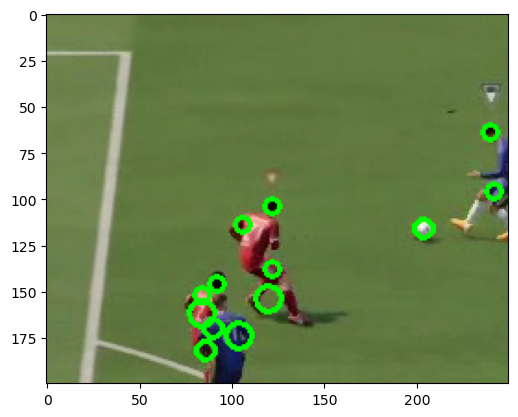

NameError: name 'network' is not defined

<Figure size 640x480 with 0 Axes>

In [89]:
while True:
    ret, frame = video1.read()
    frame = frame[200:400, 750:1000]

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask_ground = cv2.inRange(frame_hsv, np.array([0,0,0]), np.array([255,60,255]))
    # plt.imshow(cv2.cvtColor(mask_ground))
    # plt.imshow(mask_ground, cmap='gray')
    # plt.show()
    plt.figure()
    
    hframe = frame.copy()
    gframe = cv2.cvtColor(hframe, cv2.COLOR_BGR2GRAY)
    # gframe = cv2.medianBlur(gframe, 5)
    circles = cv2.HoughCircles(gframe, cv2.HOUGH_GRADIENT, 1, 9, param1=50, param2=10, minRadius=3, maxRadius=9)
    circles = circles if circles is not None else np.array([[]])
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(hframe, (i[0], i[1]), i[2], (0,255,0), 2)
        continue
    plt.imshow(cv2.cvtColor(hframe, cv2.COLOR_BGR2RGB))
    plt.show()
    # plt.imshow(gframe)

    plt.figure()
    SPORTS_BALL = 32
    height, width = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1/255., (416, 416), swapRB=True, crop=False)
    network.setInput(blob)
    output_from_network = network.forward(ln)
    boxes=[]
    confidences = []
    for out in output_from_network:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            if class_id != SPORTS_BALL: continue
            confidence = scores[class_id]
            if confidence>0.1:
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int((detection[0] - detection[2]/2) * width)
                y = int((detection[1] - detection[3]/2) * height)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    boxes = np.asarray(boxes)[indexes]
    for i, box in enumerate(boxes):
        x, y, w, h = box
        color = colors[i]
        cv2.rectangle(frame, (x,y), (x+w, y+h), color, 2)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    break

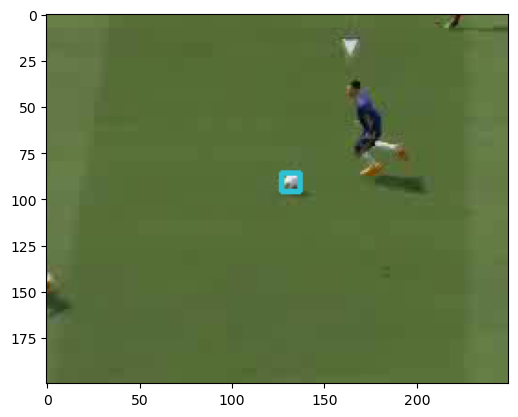

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

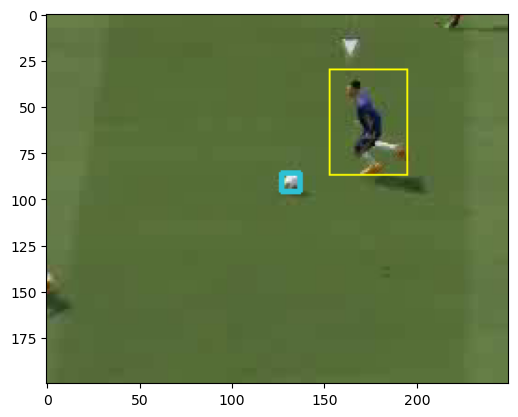

In [9]:
cv2.rectangle(
    frame, (153, 30), (195, 87), (0, 255, 255)
)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

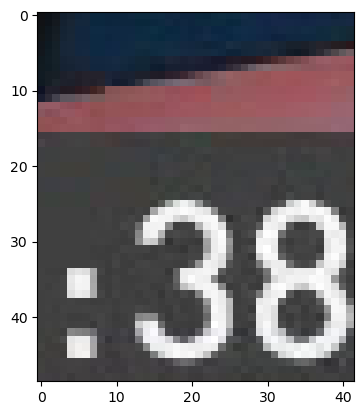

In [88]:
cropped = frame[38:87, 153:195]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

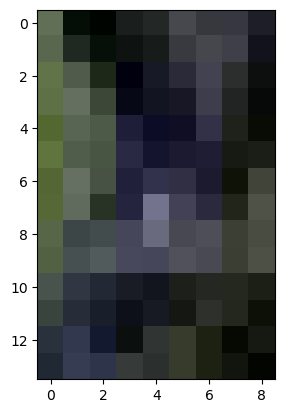

In [12]:
h, w = cropped.shape[:2]
butt = cropped[h//2:3*h//4, 2*w//5:3*w//5]
plt.imshow(cv2.cvtColor(butt, cv2.COLOR_BGR2RGB))

In [21]:
butt_hsv = cv2.cvtColor(butt, cv2.COLOR_BGR2HSV)
# butt_H, butt_S, butt_V = butt_hsv
butt_H = butt_hsv[:,:,0]
butt_S = butt_hsv[:,:,1]
butt_V = butt_hsv[:,:,2]
bins = np.arange(0, 256, 30)
np.histogram(butt_S, bins)

(array([14, 39, 32, 21,  7,  7,  2,  1]),
 array([  0,  30,  60,  90, 120, 150, 180, 210, 240]))

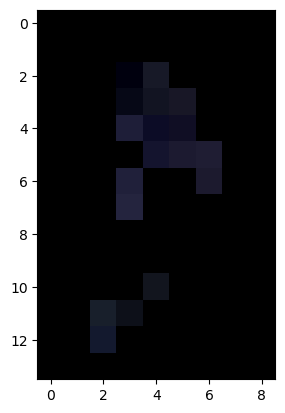

In [34]:
some_butt = np.where(butt_S.reshape(14, 9, 1)>100, butt, [0,0,0]).astype(np.uint8)
some_butt = np.where((butt_H.reshape(14,9,1)>80)|(butt_H.reshape(14,9,1)<30), some_butt, [0,0,0]).astype(np.uint8)
plt.imshow(cv2.cvtColor(some_butt, cv2.COLOR_BGR2RGB))
# plt.imshow(some_butt)
# some_butt

In [36]:
for r in range(14):
    for c in range(9):
        if some_butt[r,c,:].sum() != 0:
            print(some_butt[r,c,0])

14
39
22
34
38
56
38
36
46
48
51
58
46
62
30
43
25
46


In [38]:
bins = np.linspace(0, 256, 12)
np.histogram(some_butt, bins)

(array([345,  28,   5,   0,   0,   0,   0,   0,   0,   0,   0]),
 array([  0.        ,  23.27272727,  46.54545455,  69.81818182,
         93.09090909, 116.36363636, 139.63636364, 162.90909091,
        186.18181818, 209.45454545, 232.72727273, 256.        ]))

In [210]:
def get_butt_HSV(box, tid):
    h, w = box.shape[:2]
    butt = box[h//2:3*h//4, 2*w//5:3*w//5]
    bh, bw = butt.shape[:2]
    butt_hsv = cv2.cvtColor(butt, cv2.COLOR_BGR2HSV)
    butt_H = butt_hsv[:,:,0]
    butt_S = butt_hsv[:,:,1]
    butt_V = butt_hsv[:,:,2]
    some_butt = np.where(butt_S.reshape(bh, bw, 1)>100, butt_hsv, [0,0,0]).astype(np.uint8)
    some_butt = np.where(butt_V.reshape(bh, bw, 1)>50, some_butt, [0,0,0]).astype(np.uint8)
    some_butt = np.where((butt_H.reshape(bh,bw,1)>80)|(butt_H.reshape(bh,bw,1)<30), some_butt, [0,0,0]).astype(np.uint8)
    bins = np.array([1, 30, 80, 135, 160, 180])
    hist, bns = np.histogram(some_butt[:,:,0].flatten(), bins)
    category = np.argmax(hist)
    if hist.sum() < 10 or category not in [0, 2, 4]: return 'else'
    if category in [0, 4]: return 'red'
    return 'blue'

In [170]:
a = np.array([1, 2, 3, 4,5, 6, 7, 8])
bins = np.array([2.4, 5.4, 7.1])
np.histogram(a, bins)

(array([3, 2]), array([2.4, 5.4, 7.1]))

In [221]:
a = np.array([[1, 2, 2],
                [5, 2, 3],
                [1, 6, 2],
                [3, 7, 3],
                [9, 2, 1]])
aa = a.argmax(axis=1)
b = np.arange(5)+100
b[aa==1]
# aa

array([100, 102, 103])

In [62]:
import pickle
with open('./temp.pickle', 'rb') as fp:
    human_tids_tlwhs_list = pickle.load(fp)

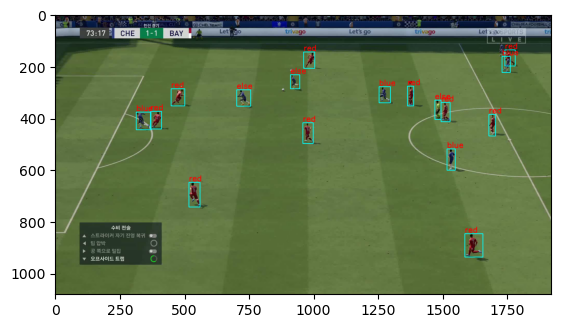

In [211]:
video1.set(cv2.CAP_PROP_POS_FRAMES, 0)
fr = 0
while True:
    ret, frame = video1.read()
    tids, tlwhs = human_tids_tlwhs_list[fr]
    for tid, (x, y, w, h) in zip(tids, tlwhs):
        if y<120: continue
        x, y, w, h = int(x), int(y), int(w), int(h)
        box = frame[y:y+h, x:x+w].copy()
        team = get_butt_HSV(box, tid)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,255,0),2)
        cv2.putText(frame, team, (x,y-5),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255),2)
        # cv2.putText(frame, str(tid), (x,y-5),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255),2)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    break

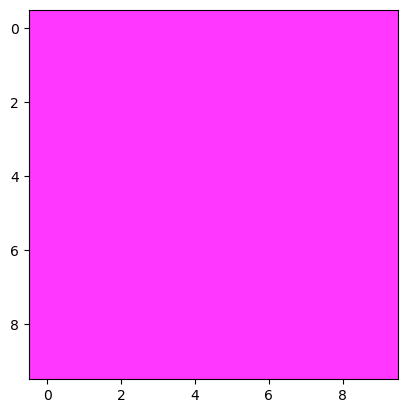

In [161]:
imim = np.zeros((10, 10, 3), dtype=np.uint8)
imim[:,:] = [150, 200, 255]
plt.imshow(cv2.cvtColor(imim, cv2.COLOR_HSV2RGB))